In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
df = pd.read_csv('worldvalues-data.csv', dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])

Populating the interactive namespace from numpy and matplotlib


In [82]:
cols = {
        'country' : 'V2',
        'literacy' : 'V255',
        'year' : 'V262',
        'religion' : 'V144'
        }

codes = {
        'literacy':{'1':'literate', '2':'illiterate'}
        }

In [2]:
'''
Comment on the trends of missing values1 in the data. For example,
a. Are the missing values from respondents increasing over the years?
b. How do the proportion of records with missing values vary over the different countries?
c. Create a new Pandas dataframe with the following columns, populate the dataframe
with appropriate values, and write it out as a CSV file.

In this context “missing values” refers to both NaN values and responses to survey questions
that have been coded as “Missing” (or its numerical code, for example, “-5” 
for the question V4).
'''

df.replace(['Missing', 'Unknown', 'Not asked in survey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
df.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR'], np.nan, inplace=True)


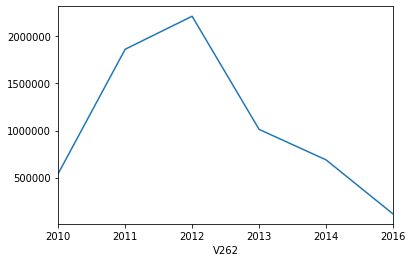

In [3]:
df['n_null'] = df.isnull().sum(axis=1)
df.groupby('V262').n_null.sum().plot()

In [4]:
df.groupby(['V262', 'V2']).n_null.sum()

V262  V2                 
2010  Japan                  253082
      Qatar                  109354
      South Korea             95159
      Trinidad and Tobago     85323
2011  Armenia                 84895
      Azerbaijan              61369
      Belarus                125481
      Cyprus                  75878
      Estonia                108877
      Kazakhstan              97277
      Kyrgyzstan              99345
      Morocco                131610
      New Zealand             83991
      Russia                 220664
      Slovenia                84771
      Spain                  107794
      Sweden                  91382
      Ukraine                100959
      United States          178295
      Uruguay                 75497
      Uzbekistan             135120
2012  Australia               97677
      Chile                   70969
      Colombia                80106
      Egypt                  107084
      Ghana                   95946
      India                  405644
  

In [5]:
df.groupby('V2').n_null.sum().sort_values(ascending=False)

V2
India                  405644
Japan                  253082
Russia                 220664
China                  213288
South Africa           204719
United States          178295
Uzbekistan             135120
Libya                  132810
Morocco                131610
Kuwait                 128907
Turkey                 127394
Belarus                125481
Singapore              124123
Mexico                 122188
Netherlands            118074
Germany                117221
Haiti                  114800
Qatar                  109354
Nigeria                108948
Estonia                108877
Spain                  107794
Romania                107680
Egypt                  107084
Ukraine                100959
Kyrgyzstan              99345
Australia               97677
Kazakhstan              97277
Ghana                   95946
Zimbabwe                95487
South Korea             95159
Sweden                  91382
Taiwan                  89004
Peru                    85777
Rwanda 

In [14]:
df

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW,n_null
0,2010-2013,Algeria,Algeria,1,1,1,1,NaN,1,1,...,1,WVS,13761,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria,55
1,2010-2013,Algeria,Algeria,2,1,2,3,4,2,2,...,1,WVS,13762,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria,53
2,2010-2013,Algeria,Algeria,3,1,3,2,4,2,1,...,1,WVS,13763,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria,46
3,2010-2013,Algeria,Algeria,4,1,1,3,4,3,1,...,1,WVS,13764,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria,50
4,2010-2013,Algeria,Algeria,5,1,1,1,2,1,1,...,1,WVS,13765,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89560,2010-2013,Zimbabwe,Zimbabwe,1496,1,3,2,4,1,1,...,1,WVS,NaN,1.5200666,2.2801001,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe,63
89561,2010-2013,Zimbabwe,Zimbabwe,1497,1,1,1,3,1,1,...,1,WVS,NaN,1.5200666,2.2801001,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe,69
89562,2010-2013,Zimbabwe,Zimbabwe,1498,1,2,1,3,1,1,...,1,WVS,NaN,1.5200666,2.2801001,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe,74
89563,2010-2013,Zimbabwe,Zimbabwe,1499,1,2,2,3,1,1,...,1,WVS,NaN,1.5200666,2.2801001,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe,68


In [17]:
53 in df[c].values

True

In [6]:
from tqdm import tqdm

In [22]:
def search(term, df = df):
    res = []
    for c in tqdm(df.columns):
        if (term in df[c].values) or (str(term) in df[c].values):
            res.append(c)
    return res

In [25]:
search('not')

 53%|█████▎    | 235/441 [00:00<00:00, 333.57it/s]/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
100%|██████████| 441/441 [00:01<00:00, 333.04it/s]


[]

In [27]:
!pip install pycountry-convert

  Using cached https://files.pythonhosted.org/packages/9b/e7/26c14899a43c34e04a58e3772007afe79dbd64fac15d2fbaeedff24082f2/pycountry_convert-0.7.2-py3-none-any.whl
     |████████████████████████████████| 235kB 995kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/4e/d1/e4ed95fdd3ef13b78630280d9e9e240aeb65cc7c544ec57106149c3942fb/pprintpp-0.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/99/95/d108de3eed0ae29d98c94c918c1245713e7f222dead2d77c24bc4ca7ca0c/pytest_mock-2.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b0/30/6cc0c95f0b59ad4b3b9163bff7cdcf793cc96fac64cf398ff26271f5cf5e/repoze.lru-0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/b6/154fe93072051d8ce7bf197690957b6d0ac9a21d51c9a1d05bd7c6fdb16f/pycountry-19.8.18.tar.gz
  Using cached https://files.pythonhosted.org/packages/b9/54/3673ee8be482f81527678ac894276223b9814bb7262e4f730469bb7bf70e/pytest_cov-2.8.1-py2.py3-none

In [28]:
!pip install pycountry

In [29]:

import pycountry
import pycountry_convert as pc

def get_continent(country):
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return continent_name

def parse_continents(s):
    try:
        code = get_continent(s)
        return code
    except:
        return np.nan

In [30]:
df['continent'] = df.V2.apply(lambda x: parse_continents(x))

In [31]:
'''
Make function that:
casts an input to int if possible and returns
otherwise
returns np.nan
'''

def to_int(x): 
    try: 
        res = float(x)
        return res
    except:
        return np.nan
    
    
df.V5 = df.V5.apply(to_int)

In [32]:
df['missing_more_than_five'] = (df.n_null > 5)

In [33]:
table = df.groupby(['V262', 'continent', 'V2'])[['n_null', 'missing_more_than_five']].agg(['count'])

In [34]:
table.to_csv('1c_out.csv')

In [61]:




'''
a. How does the proportion of respondents who are illiterate vary across countries?
'''
df.groupby([cols['country'], cols['literacy']]).agg(['count']).V1

count
V2         V255       
Algeria    1       992
           2       208
Armenia    1      1062
           2        20
Azerbaijan 1       980
...                ...
Uzbekistan 2        13
Yemen      1       596
           2       404
Zimbabwe   1      1388
           2       112

[99 rows x 1 columns]

In [64]:
table

count
V2         V255       
Algeria    1       992
           2       208
Armenia    1      1062
           2        20
Azerbaijan 1       980
...                ...
Uzbekistan 2        13
Yemen      1       596
           2       404
Zimbabwe   1      1388
           2       112

[99 rows x 1 columns]

In [74]:
def get_literacy_ratio(x):
    try:
        val = (x=='2').sum()/(x.count())
    except:
        val = np.nan
    return val

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


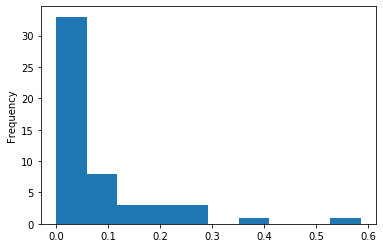

In [78]:
df.groupby(cols['country'])[cols['literacy']].apply(get_literacy_ratio).sort_values(ascending=False).plot(kind='hist')

In [81]:
df['V144'].value_counts()

Muslim             18331
None               16033
Roman Catholic     14802
Orthodox            8036
Protestant          5655
                   ...  
Spiritualists          2
Assembly of God        1
Born again             1
Zionist                1
Druse                  1
Name: V144, Length: 64, dtype: int64

In [ ]:
#V144-156 have to do with religion

In [87]:
df.groupby('V144')[cols['literacy']].apply(get_literacy_ratio).sort_values(ascending=False).head(30)

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


V144
Shia                                                                     0.431373
Hindu                                                                    0.262379
Zoroastrian                                                              0.250000
Alliance                                                                 0.212454
Paganism                                                                 0.181818
Al-Hadis                                                                 0.174603
DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
Muslim                                                                   0.147138
Sunni                                                                    0.141682
Independent African Church (e.g. ZCC, Shembe, etc.)                      0.141104
Aglipayan                                                                0.140187
Anglican                                                                 0.138943
Baptist    

In [108]:
df.groupby([cols['country'], cols['religion']])[cols['literacy']].apply(get_literacy_ratio).dropna()

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


V2        V144                                                                 
Algeria   DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
          Muslim                                                                   0.173367
Armenia   Armenian Apostolic Church                                                0.017418
          Buddhist                                                                 0.000000
          Jew                                                                      0.500000
                                                                                     ...   
Zimbabwe  None                                                                     0.053763
          Orthodox                                                                 0.000000
          Protestant                                                               0.073377
          Roman Catholic                                                           0.086667


In [111]:
df.groupby(['continent', cols['religion']])[cols['literacy']].apply(get_literacy_ratio).dropna()

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


continent  V144                                                                 
AF         Ancestral worshipping / Tradition                                        0.071429
           Buddhist                                                                 0.066667
           DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
           Hindu                                                                    0.073529
           Independent African Church (e.g. ZCC, Shembe, etc.)                      0.141104
                                                                                      ...   
SA         Pentecostal                                                              0.100000
           Protestant                                                               0.026936
           Roman Catholic                                                           0.018018
           Seven Day Adventist                                                    

In [113]:
df['V2'] == 'United States'

0        False
1        False
2        False
3        False
4        False
         ...  
89560    False
89561    False
89562    False
89563    False
89564    False
Name: V2, Length: 89565, dtype: bool